# Data Visualization with matplotlib

| Information | Details |
|----------|---------|
| Learning Objectives | • Understand matplotlib's figure and axes concepts<br>• Create time series plots for power system data<br>• Build statistical visualizations<br>• Combine multiple plots effectively |
| Prerequisites | Basic Python, NumPy, Pandas |
| Estimated Time | 45 minutes |
| Topics | matplotlib fundamentals, plotting functions, power system visualization |

## Introduction

Power systems generate vast amounts of data that need to be visualized for analysis and decision-making. Whether you're examining load profiles, analyzing market prices, or studying generation patterns, effective visualization is essential. This lesson introduces matplotlib, Python's foundational plotting library, focusing on the core concepts and functions you'll use most often in power system analysis.

We'll start with matplotlib's fundamental concepts of figures and axes, which can be confusing at first but are crucial to understand. Then we'll build your skills progressively, from simple line plots to combining multiple visualizations. By the end, you'll be able to create clear, professional plots that effectively communicate power system data.

## Setting Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a clean style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')

# Ensure plots appear inline in Jupyter
%matplotlib inline

## Understanding Figures and Axes

Before we create any plots, it's essential to understand matplotlib's structure. Many beginners find this confusing, but grasping these concepts will make everything else much easier.

In matplotlib, a **figure** is like a blank canvas or a sheet of paper. It's the overall window or page that will contain your plots. An **axes** (note: not "axis") is the actual plotting area where your data appears - the box with the x and y axes where lines, points, or bars are drawn. A single figure can contain multiple axes (subplots), but each axes belongs to exactly one figure.

Think of it this way: if you're drawing a graph on paper, the paper is the figure, and the box where you draw the graph is the axes. Let's see this in practice:

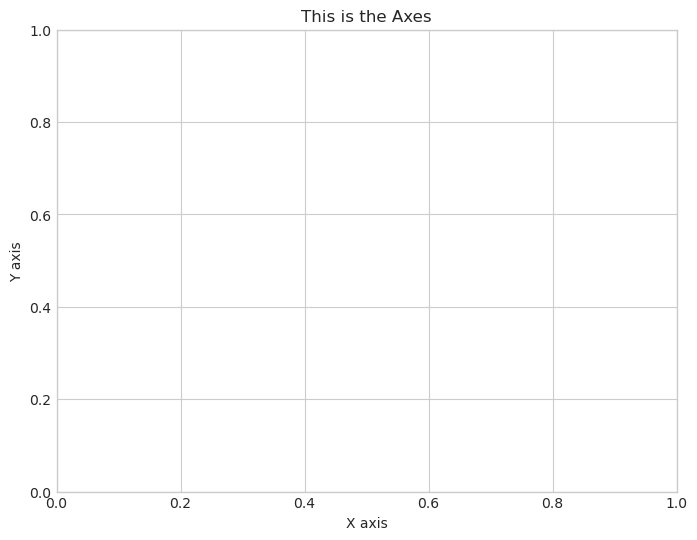

In [2]:
# Create a figure and axes explicitly
fig, ax = plt.subplots()

# The figure is the 8x6 inch window
fig.set_size_inches(8, 6)

# The axes is where we actually plot
ax.set_title('This is the Axes')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')

plt.show()

Notice how we used `fig` to set the overall size, but we used `ax` to set the title and labels. This distinction is important: figure-level commands affect the whole canvas, while axes-level commands affect the specific plot area.

Now you might wonder why matplotlib makes this distinction. The power becomes clear when you want multiple plots in one figure. Each subplot is a separate axes object, but they all belong to the same figure. This organization gives you precise control over every aspect of your visualization.

## Sample Power System Data

To learn plotting, we need some realistic power system data. Let's create a simple dataset representing one week of hourly load data for a power system. This synthetic data will exhibit the typical patterns you'd see in real systems: higher load during the day, lower at night, and variations between weekdays and weekends.

In [3]:
# Create one week of hourly data
np.random.seed(42)  # For reproducibility
hours = pd.date_range('2024-01-01', periods=168, freq='h')

# Generate load with daily pattern
base_load = 5000  # MW
daily_pattern = 1000 * np.sin((hours.hour - 6) * np.pi / 12)
noise = np.random.normal(0, 100, len(hours))
load = base_load + daily_pattern + noise

# Create DataFrame
data = pd.DataFrame({
    'timestamp': hours,
    'load': load,
    'price': 30 + (load - 5000) / 50 + np.random.normal(0, 5, len(hours))
})

In [4]:
print(f"Data shape: {data.shape}")
print(f"Load range: {data['load'].min():.0f} - {data['load'].max():.0f} MW")
data.head()

Data shape: (168, 3)
Load range: 3858 - 6187 MW


,timestamp,load,price
0,2024-01-01 00:00:00,4049.671415,9.766488
1,2024-01-01 01:00:00,4020.247744,6.636274
2,2024-01-01 02:00:00,4198.743450,9.527297
3,2024-01-01 03:00:00,4445.196204,14.824873
4,2024-01-01 04:00:00,4476.584663,19.146185


## Your First Plot: Line Plot with plot()

The most common plot in power system analysis is the time series line plot. You'll use this constantly to visualize load profiles, generation output, prices, and any other quantity that changes over time. The `plot()` function is your workhorse for creating line plots.

Let's create a basic load profile plot. We'll start simple and then progressively enhance it to make it more informative and professional:

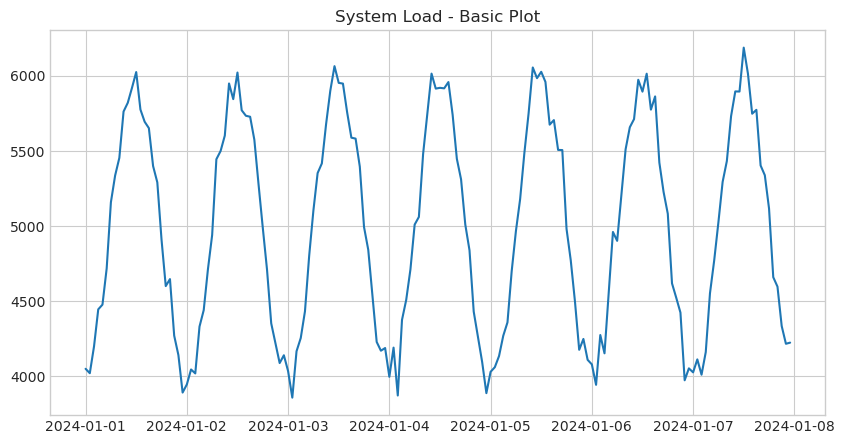

In [5]:
# Create a simple line plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(data['timestamp'], data['load'])
ax.set_title('System Load - Basic Plot')

plt.show()

This works, but it's not very informative. The x-axis labels are overlapping, there are no units on the y-axis, and the plot lacks visual polish. Let's improve it by adding proper labels, formatting, and styling. Each enhancement serves a specific purpose in making the data clearer:

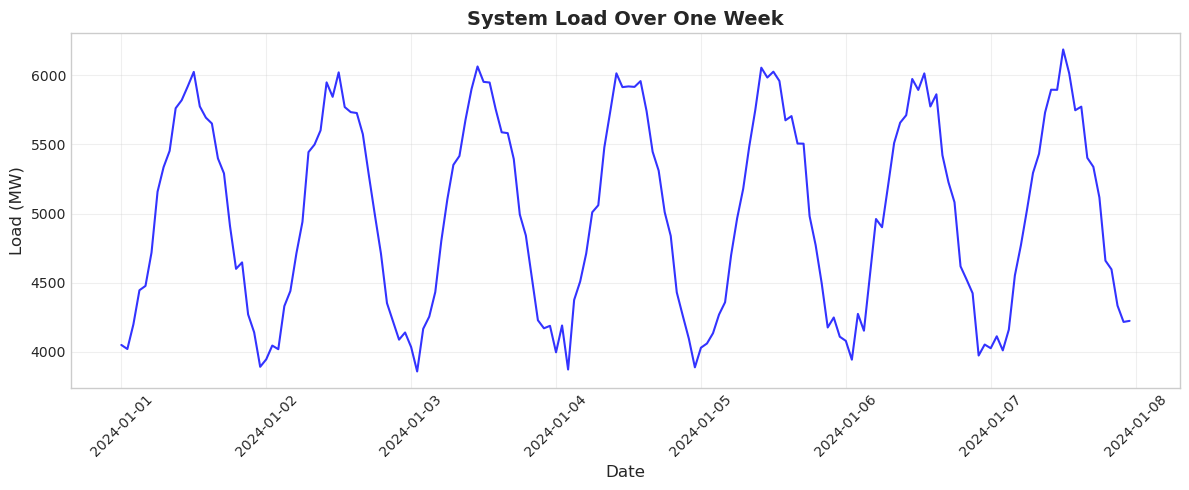

In [6]:
# Create an improved line plot
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(data['timestamp'], data['load'], 
        color='blue',      # Line color
        linewidth=1.5,     # Line thickness
        alpha=0.8)         # Slight transparency

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Load (MW)', fontsize=12)
ax.set_title('System Load Over One Week', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)  # Add grid for easier reading

plt.xticks(rotation=45)  # Rotate x-labels to prevent overlap
plt.tight_layout()  # Adjust spacing to prevent label cutoff
plt.show()

Much better! The plot now clearly shows the daily load pattern with peaks during daytime hours and valleys at night. The grid helps readers estimate values, and the rotated dates are readable. The `tight_layout()` function is particularly useful - it automatically adjusts spacing to prevent labels from being cut off, which is a common problem in matplotlib.

## Adding Context with Horizontal Lines

In power system analysis, we often need to show reference levels like capacity limits, average values, or thresholds. The `axhline()` function adds horizontal lines to provide this context. Let's add lines showing the average load and a hypothetical system capacity limit:

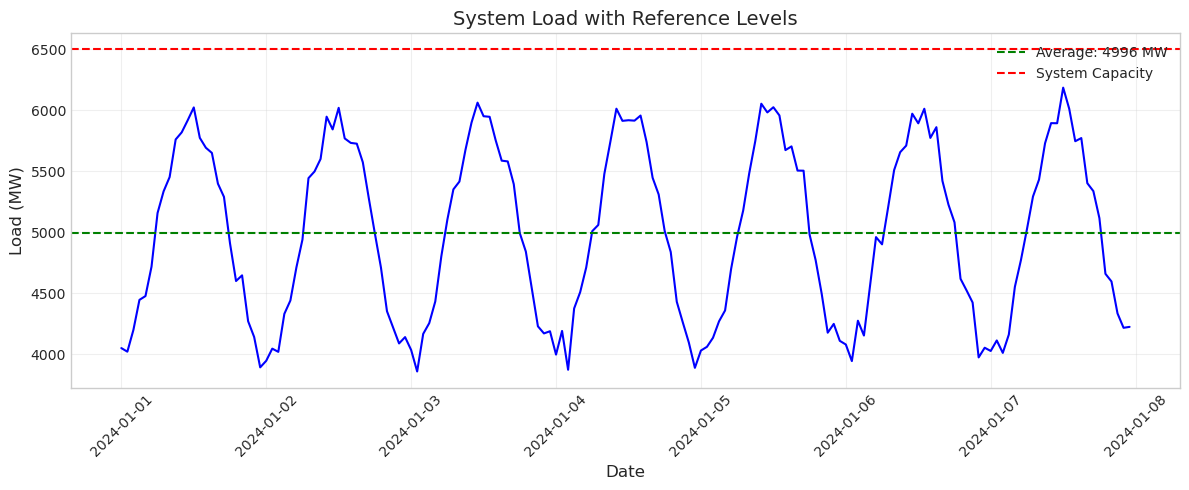

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))

# Main load plot
ax.plot(data['timestamp'], data['load'], color='blue', linewidth=1.5)

# Add reference lines
avg_load = data['load'].mean()
ax.axhline(y=avg_load, color='green', linestyle='--', 
           label=f'Average: {avg_load:.0f} MW')
ax.axhline(y=6500, color='red', linestyle='--', 
           label='System Capacity')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Load (MW)', fontsize=12)
ax.set_title('System Load with Reference Levels', fontsize=14)
ax.legend()  # Show legend for the reference lines
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The reference lines immediately provide context. You can see that the system stays well below its capacity limit and oscillates around the average. This technique is invaluable for highlighting important thresholds or comparing actual values to targets.

## Statistical Plots: Histograms with hist()

While time series show how values change over time, histograms reveal the distribution of values. In power systems, you might use histograms to analyze price distributions, load factors, or outage durations. The `hist()` function creates these distribution plots.

Let's examine the distribution of electricity prices in our dataset:

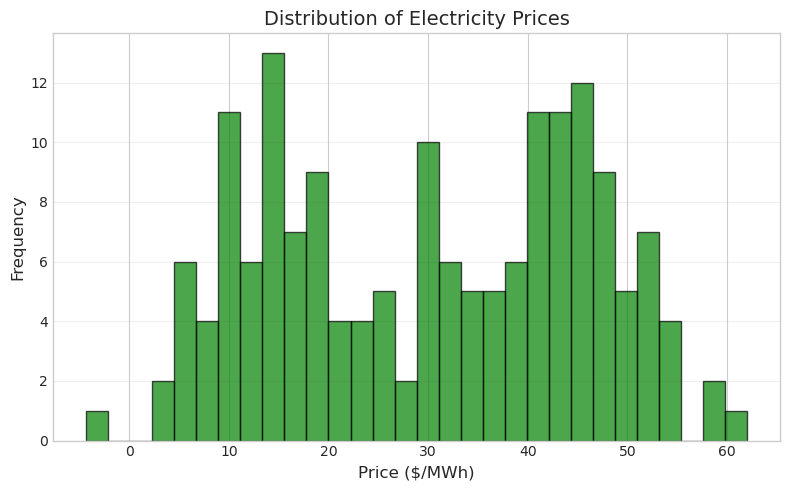

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(data['price'], bins=30, color='green', alpha=0.7, edgecolor='black')

ax.set_xlabel('Price ($/MWh)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Electricity Prices', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

The histogram shows that prices are roughly normally distributed around $40/MWh. The `bins` parameter controls how many bars to use - more bins show more detail but can make the distribution look noisy. The `edgecolor` parameter adds black borders to each bar, making them easier to distinguish.

Let's enhance this by adding statistical information directly to the plot:

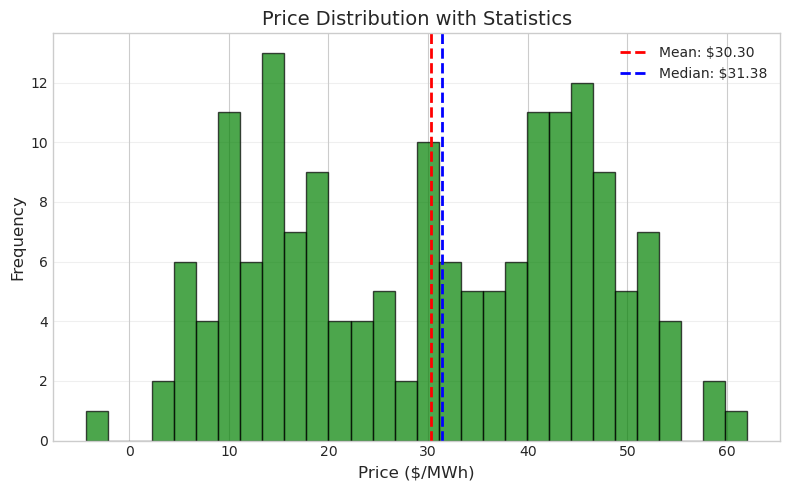

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(data['price'], bins=30, color='green', alpha=0.7, edgecolor='black')

# Add mean and median lines
mean_price = data['price'].mean()
median_price = data['price'].median()
ax.axvline(mean_price, color='red', linestyle='--', linewidth=2, 
           label=f'Mean: ${mean_price:.2f}')
ax.axvline(median_price, color='blue', linestyle='--', linewidth=2, 
           label=f'Median: ${median_price:.2f}')

ax.set_xlabel('Price ($/MWh)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Price Distribution with Statistics', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Scatter Plots for Relationships

Scatter plots reveal relationships between variables. In power systems, you might examine how price relates to load, how efficiency varies with output, or how renewable generation affects system stability. The `scatter()` function creates these plots.

Let's explore the relationship between load and price, which is fundamental to understanding electricity markets:

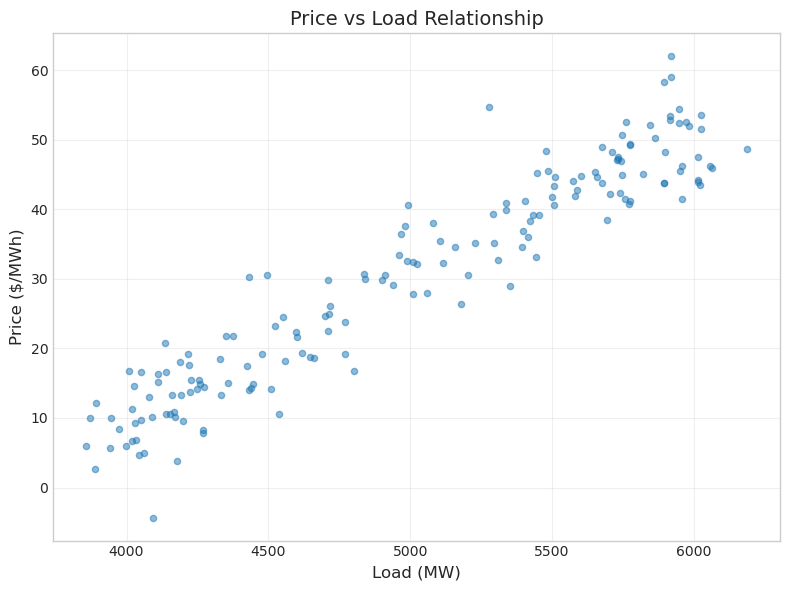

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(data['load'], data['price'], alpha=0.5, s=20)

ax.set_xlabel('Load (MW)', fontsize=12)
ax.set_ylabel('Price ($/MWh)', fontsize=12)
ax.set_title('Price vs Load Relationship', fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The scatter plot shows a positive correlation between load and price - as demand increases, prices tend to rise. This makes economic sense: higher demand requires more expensive generators to be dispatched. The `alpha` parameter makes points semi-transparent, which helps reveal density when points overlap. The `s` parameter controls point size.

We can enhance this visualization by adding a trend line to quantify the relationship:

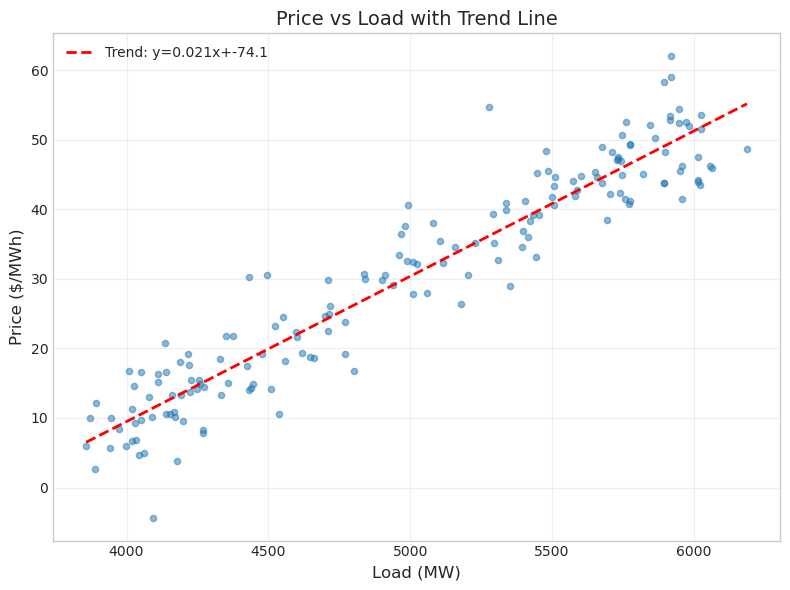

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(data['load'], data['price'], alpha=0.5, s=20)

# Add trend line
z = np.polyfit(data['load'], data['price'], 1)  # Linear fit
p = np.poly1d(z)
ax.plot(data['load'].sort_values(), p(data['load'].sort_values()), 
        'r--', linewidth=2, label=f'Trend: y={z[0]:.3f}x+{z[1]:.1f}')

ax.set_xlabel('Load (MW)', fontsize=12)
ax.set_ylabel('Price ($/MWh)', fontsize=12)
ax.set_title('Price vs Load with Trend Line', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Bar Plots for Categorical Data

Bar plots are ideal for comparing discrete categories. In power systems, you might compare generation by fuel type, outages by cause, or average prices by hour of day. The `bar()` function creates these visualizations.

Let's analyze average load by day of the week to see if there are patterns:

In [12]:
# Calculate average load by day of week
data['day_name'] = data['timestamp'].dt.day_name()
daily_avg = data.groupby('day_name')['load'].mean()

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
             'Friday', 'Saturday', 'Sunday']
daily_avg = daily_avg.reindex(day_order)

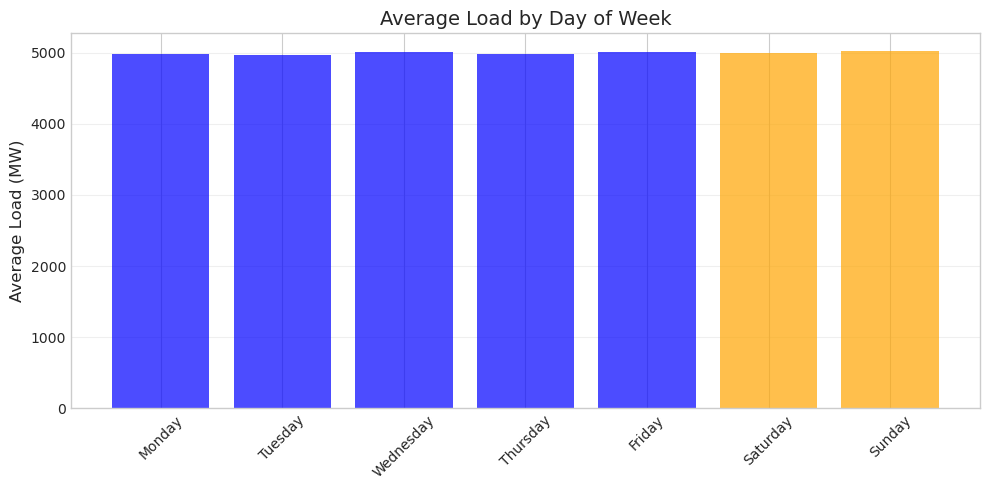

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

colors = ['blue']*5 + ['orange']*2  # Weekdays blue, weekends orange
ax.bar(range(7), daily_avg.values, color=colors, alpha=0.7)

ax.set_xticks(range(7))
ax.set_xticklabels(day_order, rotation=45)
ax.set_ylabel('Average Load (MW)', fontsize=12)
ax.set_title('Average Load by Day of Week', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

The color coding immediately distinguishes weekdays from weekends. In real power systems, you'd typically see lower weekend loads due to reduced industrial and commercial activity. The bar plot makes these comparisons clear and immediate.

## Combining Plots with Subplots

Often you need to show multiple related plots together. The `subplots()` function creates multiple axes in a single figure, allowing you to present different views of your data side by side. This is essential for comprehensive analysis where single plots don't tell the whole story.

Let's create a two-panel figure showing both load and price over time:

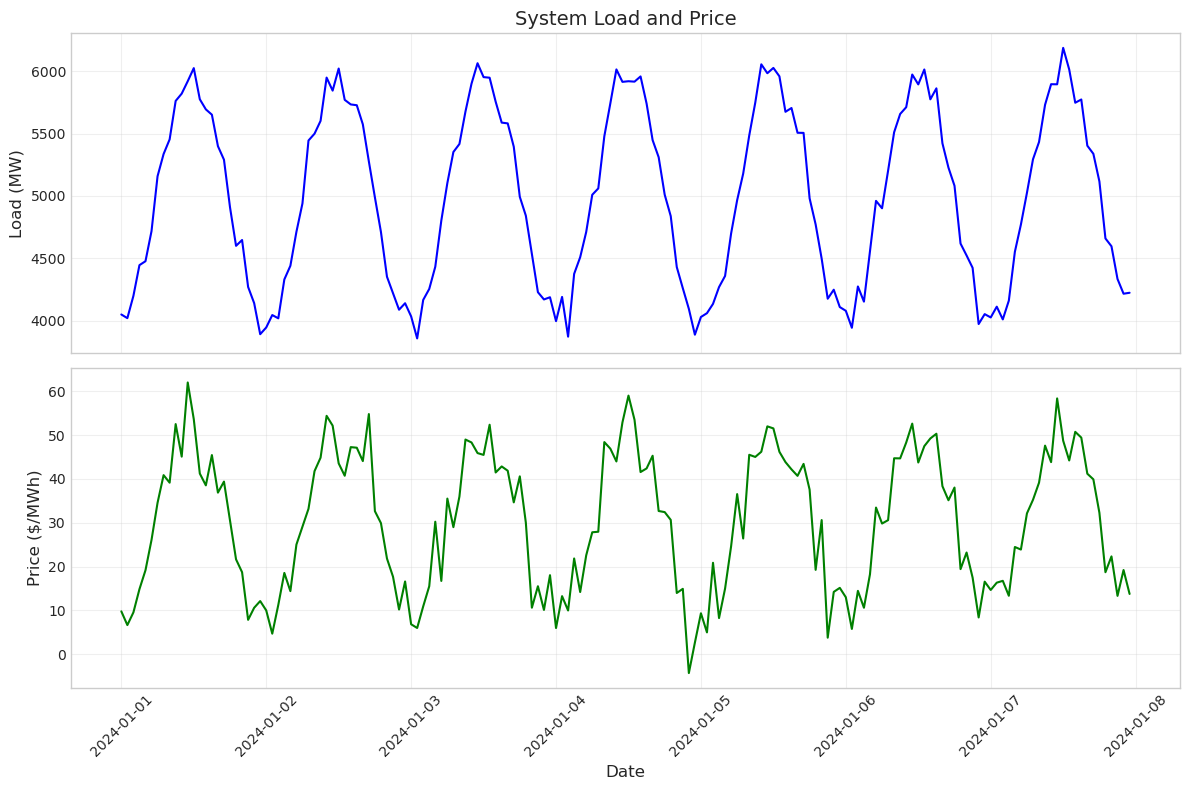

In [14]:
# Create figure with 2 subplots stacked vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top plot: Load
ax1.plot(data['timestamp'], data['load'], color='blue')
ax1.set_ylabel('Load (MW)', fontsize=12)
ax1.set_title('System Load and Price', fontsize=14)
ax1.grid(True, alpha=0.3)

# Bottom plot: Price
ax2.plot(data['timestamp'], data['price'], color='green')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Price ($/MWh)', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The `sharex=True` parameter is particularly useful here - it links the x-axes of both plots so they zoom and pan together. This makes it easy to see how load and price correlate at specific times. Notice how price peaks generally align with load peaks, confirming the relationship we saw in the scatter plot.

You can also arrange subplots side by side for different types of analysis:

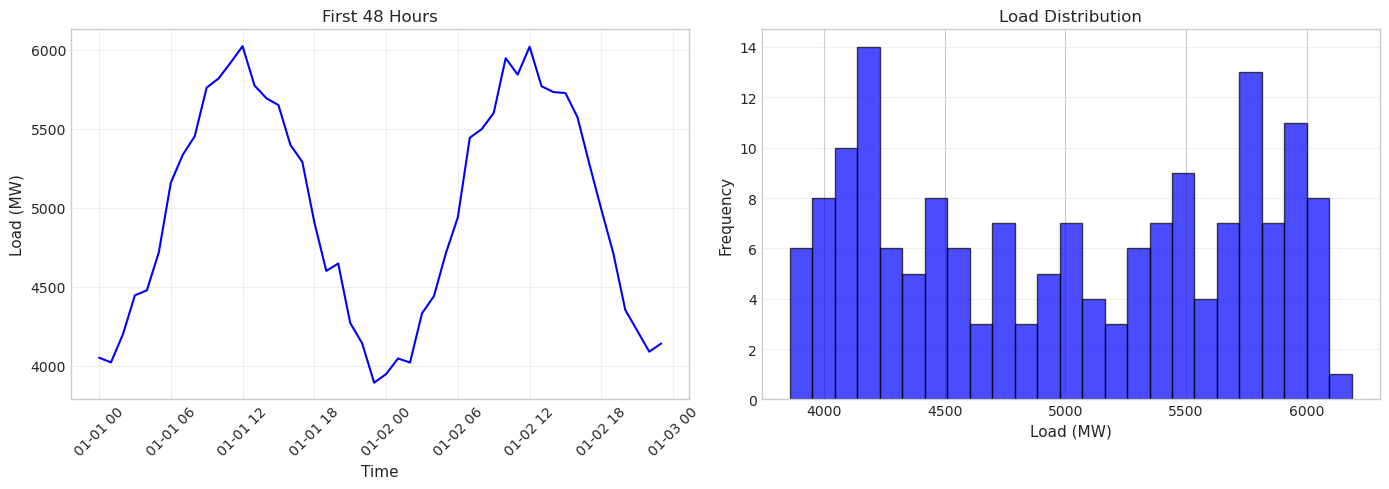

In [15]:
# Create figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left: Time series
ax1.plot(data['timestamp'][:48], data['load'][:48], color='blue')
ax1.set_xlabel('Time', fontsize=11)
ax1.set_ylabel('Load (MW)', fontsize=11)
ax1.set_title('First 48 Hours', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Right: Distribution
ax2.hist(data['load'], bins=25, color='blue', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Load (MW)', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Load Distribution', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

This side-by-side arrangement lets you see both the temporal pattern and the statistical distribution at once. The time series shows the regular daily cycle, while the histogram reveals that load values cluster around 5000 MW with symmetric variation.

## Saving Your Plots

Creating plots in Jupyter is useful for analysis, but you'll often need to save them for reports or presentations. The `savefig()` function exports your plots in various formats. Here's how to save a publication-quality figure:

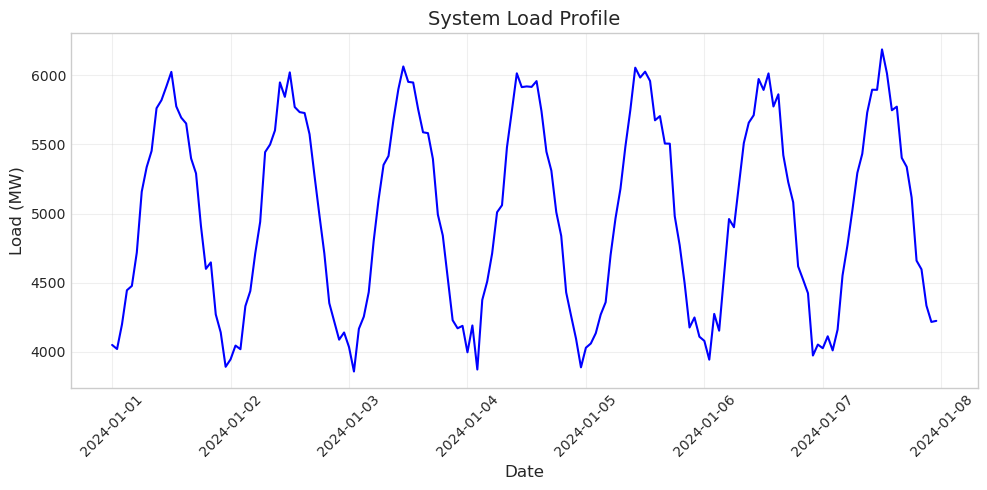

To save this figure, uncomment the savefig lines above


In [16]:
# Create a plot to save
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data['timestamp'], data['load'], color='blue', linewidth=1.5)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Load (MW)', fontsize=12)
ax.set_title('System Load Profile', fontsize=14)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Save in different formats
# plt.savefig('load_profile.png', dpi=300, bbox_inches='tight')
# plt.savefig('load_profile.pdf', bbox_inches='tight')

plt.show()
print("To save this figure, uncomment the savefig lines above")

The `dpi` parameter controls resolution (dots per inch) - 300 is good for publications. The `bbox_inches='tight'` parameter ensures no labels are cut off. PDF format is best for publications as it's vector-based and scales perfectly, while PNG is good for presentations and web use.

### Exercise 1: Create a Load Duration Curve

A load duration curve shows how frequently the system operates at different load levels, essential for capacity planning and economic analysis. By sorting loads from highest to lowest, it reveals what percentage of time the system exceeds any given load level.

Steps:

1. Sort the load values in descending order using `np.sort(data['load'].values)[::-1]` and create an array of hour indices from 0 to 167 with `np.arange()`. Plot these using `ax.plot()` with the hours on the x-axis and sorted loads on the y-axis. Set the figure size to (10, 5) for good visibility.

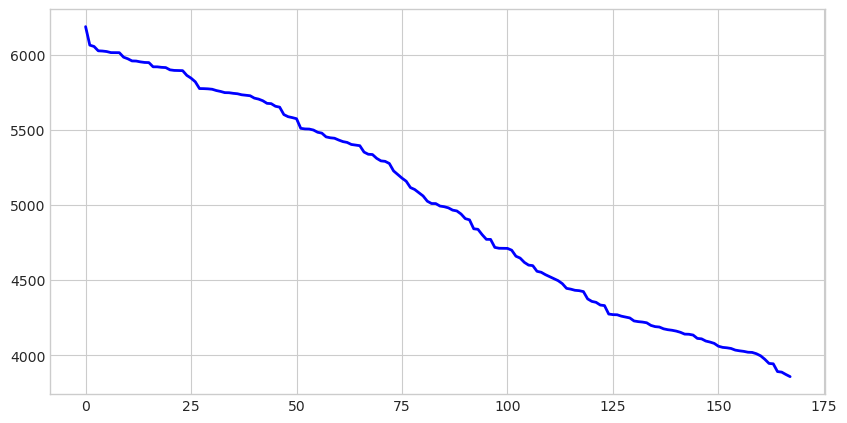

In [17]:
# Create the load duration curve
fig, ax = plt.subplots(figsize=(10, 5))

# Sort load values from highest to lowest
load_sorted = np.sort(data['load'].values)[::-1]
hours = np.arange(len(load_sorted))

# Plot the curve
ax.plot(hours, load_sorted, color='blue', linewidth=2)
plt.show()

2. Add two horizontal reference lines to provide context. First, calculate and plot the mean load with `ax.axhline()` using a green dashed line. Then add a red dashed line at 6000 MW to represent a planning threshold. Include labels for both lines in the `axhline()` calls so they appear in the legend. Finally, add axis labels ("Hours" and "Load (MW)"), a title ("Load Duration Curve"), grid, and legend.

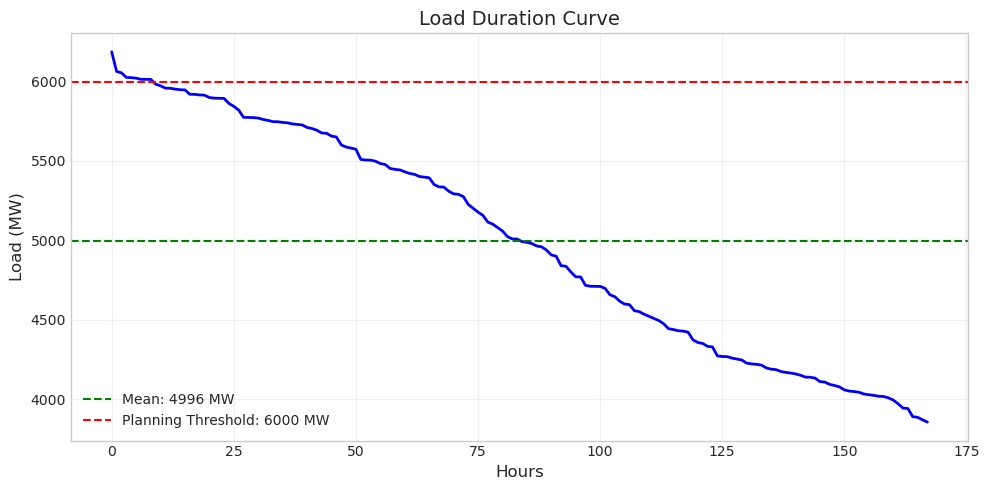

In [18]:
# Create the complete load duration curve
fig, ax = plt.subplots(figsize=(10, 5))

# Sort and plot
load_sorted = np.sort(data['load'].values)[::-1]
hours = np.arange(len(load_sorted))
ax.plot(hours, load_sorted, color='blue', linewidth=2)

# Add reference lines
mean_load = data['load'].mean()
ax.axhline(mean_load, color='green', linestyle='--', 
           label=f'Mean: {mean_load:.0f} MW')
ax.axhline(6000, color='red', linestyle='--', 
           label='Planning Threshold: 6000 MW')

# Format the plot
ax.set_xlabel('Hours', fontsize=12)
ax.set_ylabel('Load (MW)', fontsize=12)
ax.set_title('Load Duration Curve', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The load duration curve reveals important planning information. The system exceeds 6000 MW for only a small fraction of the time (the left portion of the curve), suggesting that building capacity for these peak hours might not be economical. The area under the curve represents total energy consumed over the week.

## Exercise 2: Daily Patterns Analysis

Power system operators need to understand daily load patterns to schedule generation and plan for peak demands. Create a visualization that shows the average hourly load profile for a typical day.

Extract the hour from each timestamp, calculate the average load for each hour of the day (0-23), and create a bar plot. Color the bars differently for nighttime hours (0-5, 22-23) versus daytime hours. Add a horizontal line showing the overall average load.

**Hint:** Use `data['timestamp'].dt.hour` to extract hours, then group by hour and calculate means.

In [19]:
# Exercise 2: Analyze daily patterns
# Your code here

### Solution to Exercise 2

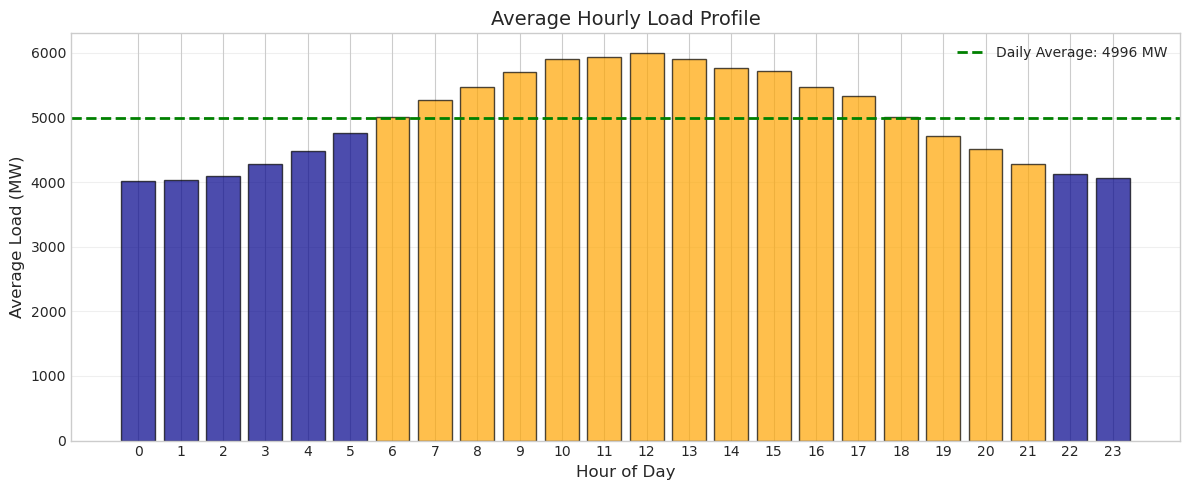

Peak hour: 12:00
Off-peak hour: 0:00


In [20]:
# Solution: Daily Pattern Analysis
data['hour'] = data['timestamp'].dt.hour
hourly_avg = data.groupby('hour')['load'].mean()

fig, ax = plt.subplots(figsize=(12, 5))

# Create colors: blue for night, orange for day
colors = ['darkblue' if h <= 5 or h >= 22 else 'orange' 
          for h in range(24)]

bars = ax.bar(range(24), hourly_avg.values, color=colors, 
              alpha=0.7, edgecolor='black')

# Add average line
ax.axhline(data['load'].mean(), color='green', linestyle='--', 
           linewidth=2, label=f'Daily Average: {data["load"].mean():.0f} MW')

ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Average Load (MW)', fontsize=12)
ax.set_title('Average Hourly Load Profile', fontsize=14)
ax.set_xticks(range(24))
ax.set_xticklabels(range(24))
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Peak hour: {hourly_avg.idxmax()}:00")
print(f"Off-peak hour: {hourly_avg.idxmin()}:00")

This daily profile clearly shows the diurnal pattern of electricity consumption. Load is lowest in the early morning hours (around 3-4 AM) when most people are asleep and industrial activity is minimal. It rises through the morning, peaks during the day, and gradually decreases in the evening. This pattern drives daily generator scheduling and real-time market operations.

## Exercise 3: Price Analysis Dashboard

Create a simple two-panel analysis of electricity prices. In the top panel, show the price time series for the first 72 hours. In the bottom panel, create a scatter plot of price versus load for the entire week with a trend line.

Make sure both plots share a consistent style, have proper labels, and include grids for readability. The figure should be 12 inches wide and 8 inches tall.

**Hint:** Use `plt.subplots(2, 1, figsize=(12, 8))` to create the two panels.

In [21]:
# Exercise 3: Create price analysis dashboard
# Your code here

### Solution to Exercise 3

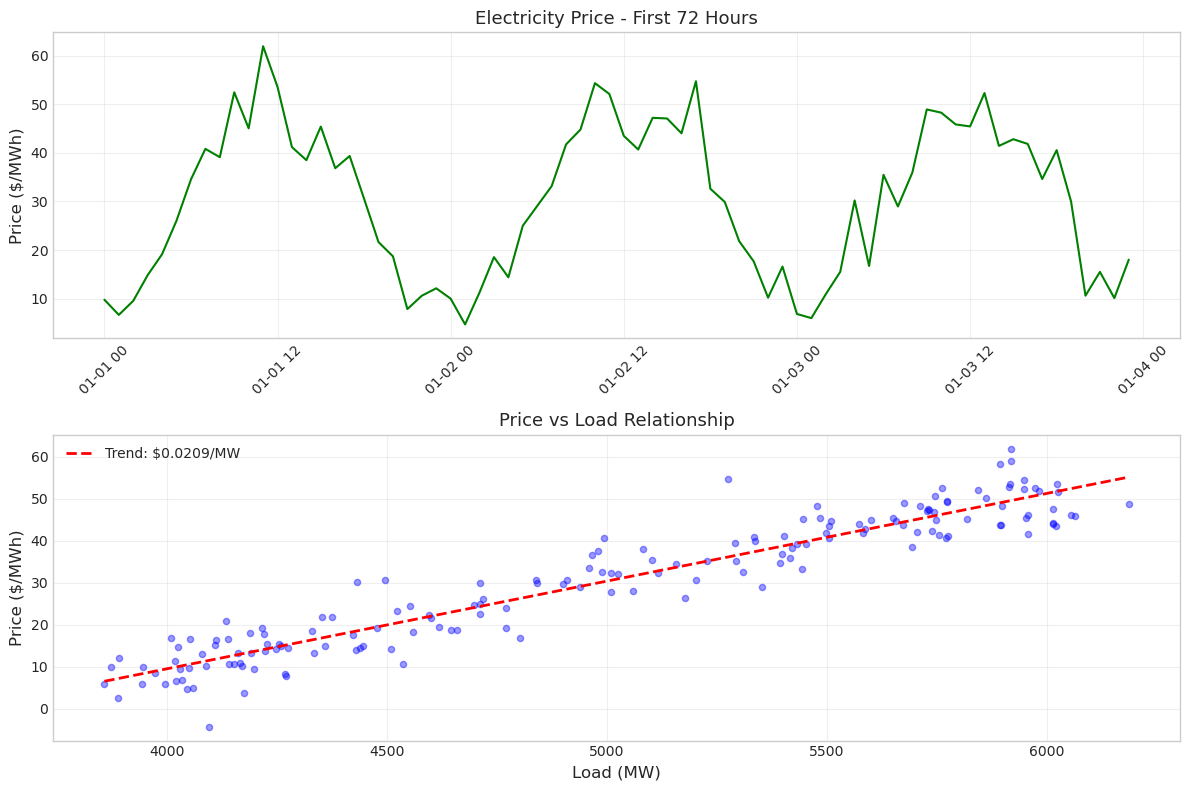

Load-Price Correlation: 0.950


In [22]:
# Solution: Price Analysis Dashboard
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Top panel: Price time series (first 72 hours)
ax1.plot(data['timestamp'][:72], data['price'][:72], 
         color='green', linewidth=1.5)
ax1.set_ylabel('Price ($/MWh)', fontsize=12)
ax1.set_title('Electricity Price - First 72 Hours', fontsize=13)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Bottom panel: Price vs Load scatter
ax2.scatter(data['load'], data['price'], alpha=0.4, s=20, color='blue')

# Add trend line
z = np.polyfit(data['load'], data['price'], 1)
p = np.poly1d(z)
ax2.plot(data['load'].sort_values(), p(data['load'].sort_values()), 
         'r--', linewidth=2, label=f'Trend: ${z[0]:.4f}/MW')

ax2.set_xlabel('Load (MW)', fontsize=12)
ax2.set_ylabel('Price ($/MWh)', fontsize=12)
ax2.set_title('Price vs Load Relationship', fontsize=13)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = data['load'].corr(data['price'])
print(f"Load-Price Correlation: {correlation:.3f}")

This dashboard provides two complementary views of price behavior. The time series shows temporal patterns and volatility, while the scatter plot reveals the fundamental economic relationship between supply/demand balance (represented by load) and price. The positive correlation confirms basic economic theory: as demand increases, prices rise due to the need to dispatch more expensive generation resources.

## Key Takeaways

You've now learned the essential matplotlib functions for power system data visualization. The distinction between figure and axes is fundamental - the figure is your canvas, while axes are the actual plotting areas. This becomes especially important when creating multi-panel visualizations.

The four main plot types we covered - `plot()` for time series, `hist()` for distributions, `scatter()` for relationships, and `bar()` for categories - will handle most of your visualization needs. Remember that good visualizations aren't just about the data; they're about communication. Always include clear labels, appropriate scales, and reference lines when they add context.

As you continue working with power system data, you'll find these visualization techniques invaluable for understanding system behavior, identifying patterns, and communicating findings to others. Whether you're analyzing market data, studying renewable integration, or evaluating system reliability, effective visualization is key to turning data into insights.

## Quick Reference

Here are the essential matplotlib functions we covered:

```python
# Creating figures and axes
fig, ax = plt.subplots(figsize=(width, height))
fig, (ax1, ax2) = plt.subplots(2, 1)  # Multiple subplots

# Main plotting functions
ax.plot(x, y)         # Line plot
ax.scatter(x, y)      # Scatter plot
ax.hist(data, bins)   # Histogram
ax.bar(x, heights)    # Bar plot

# Customization
ax.set_xlabel('label')
ax.set_ylabel('label')
ax.set_title('title')
ax.legend()
ax.grid(True, alpha=0.3)

# Reference lines
ax.axhline(y_value)   # Horizontal line
ax.axvline(x_value)   # Vertical line

# Display and save
plt.tight_layout()    # Adjust spacing
plt.show()           # Display plot
plt.savefig('filename.png', dpi=300)
```